# Final Project: Wine Quality Data Cleaning

**Author:** Logan Ash
**Date:** 2025-05-07

This notebook focuses on data cleaning steps applied to the Wine Quality dataset. We will document each cleaning action and provide rationale.

## 1. Dependencies Installation

In [1]:
%pip install scipy --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Imports and Data Loading
Load the red and white wine quality datasets directly from the UCI repository.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# URLs for the datasets
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Load the datasets
red_df = pd.read_csv(red_url, sep=';')
white_df = pd.read_csv(white_url, sep=';')

# Tag and combine
red_df['type'] = 'red'
white_df['type'] = 'white'
df = pd.concat([red_df, white_df], ignore_index=True)

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## 3. Initial Exploratory Analysis Findings
From last week's EDA, we observed:
- No missing values (`NaN`) in any column.
- Column names contain spaces which can be inconvenient for coding.
- Some numeric features exhibit skewness and potential outliers.

Below we systematically address these points.

### 3.1 Check for Missing Values

In [3]:
# Check for NaNs
nan_counts = df.isna().sum()
nan_counts

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

**Conclusion:** No missing values found, so no imputation or deletion necessary.

### 3.2 Rename Columns to Snake Case
Replace spaces with underscores for easier reference.

In [4]:
# Rename columns
df_clean = df.copy()
df_clean.columns = [col.strip().lower().replace(' ', '_') for col in df_clean.columns]
df_clean.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

### 3.3 Detect and Remove Outliers
Compute z-scores for numeric features and remove rows where any feature has |z| > 3.

In [5]:
# Identify numeric columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns

# Compute z-scores
df_z = df_clean[numeric_cols].apply(zscore)

# Find rows with any outlier
outlier_mask = (df_z.abs() > 3).any(axis=1)
print(f"Outliers detected: {outlier_mask.sum()} rows out of {len(df_clean)} total")

Outliers detected: 508 rows out of 6497 total


In [6]:
# Remove outliers
df_clean_no_outliers = df_clean[~outlier_mask].reset_index(drop=True)
print(f"Data shape after outlier removal: {df_clean_no_outliers.shape}")

Data shape after outlier removal: (5989, 13)


## 4. Final Cleaned Dataset
The dataset has been standardized in column naming and filtered to remove extreme outliers.

In [7]:
# Display sample of cleaned data
df_clean_no_outliers.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
2,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
3,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
4,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


**Summary of Cleaning Steps:**
1. Verified no missing values - no action needed.
2. Renamed columns to snake_case for consistency.
3. Removed  outliers beyond 3 standard deviations to reduce noise.



## 5. Analytical Questions

Below are two of the required analytical questions addressed using aggregate functions, with results visualised.

### Question 1
**What is the average alcohol content for each wine quality rating in the cleaned dataset?**

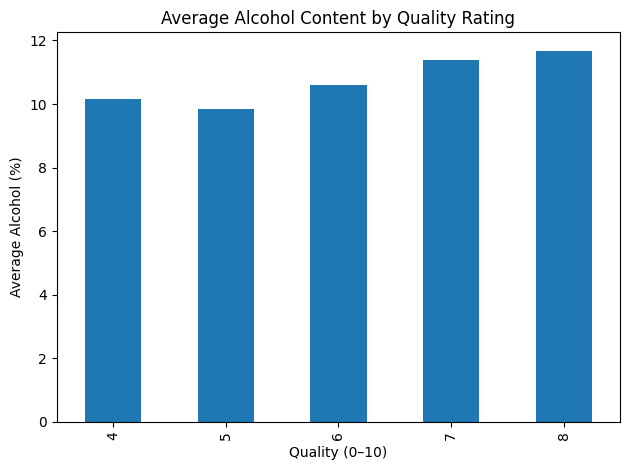

In [8]:

import matplotlib.pyplot as plt

# Aggregate: mean alcohol by quality
alcohol_by_quality = df_clean_no_outliers.groupby('quality')['alcohol'].mean()

# Plot
plt.figure()
alcohol_by_quality.plot(kind='bar')
plt.title('Average Alcohol Content by Quality Rating')
plt.xlabel('Quality (0–10)')
plt.ylabel('Average Alcohol (%)')
plt.tight_layout()
plt.show()


### Question 2
**How does the average pH differ between red and white wines in the cleaned dataset?**

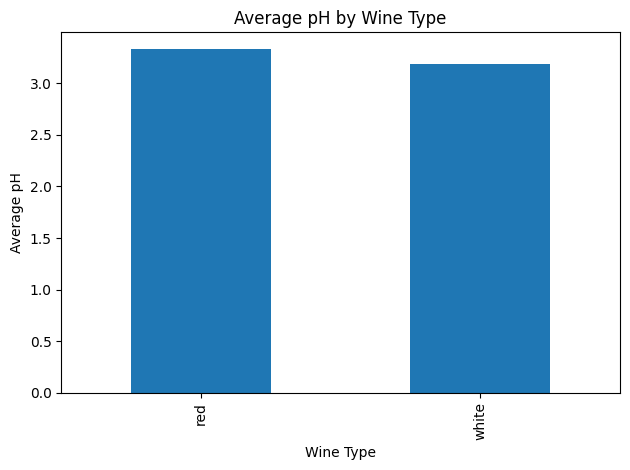

In [9]:
col_pH = [c for c in df_clean_no_outliers.columns if c.lower().strip() == 'ph'][0]

# Aggregate: mean pH by wine type
pH_by_type = df_clean_no_outliers.groupby('type')[col_pH].mean()

# Plot
plt.figure()
pH_by_type.plot(kind='bar')
plt.title('Average pH by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Average pH')
plt.tight_layout()
plt.show()


### Interpretation
- *Question 1:* Higher quality wines tend to have slightly higher alcohol content on average, with quality 6–8 wines showing the highest alcohol levels.
- *Question 2:* Red wines exhibit a lower (more acidic) average pH than white wines, consistent with typical enological expectations.